# 📖 Import Library 

In [12]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling numerical features
from sklearn.ensemble import RandomForestClassifier  # The random forest classifier model
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation

# 💻 Load in data

In [15]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [17]:
df.shape

(8863, 34)

In [19]:
df.dtypes

game_id              object
hand_id               int64
round                object
player_name          object
action               object
amount                int64
hole_cards           object
community_cards      object
pot                   int64
player_stack          int64
small_blind           int64
big_blind             int64
winner               object
card1                object
card2                object
card1_suit            int64
card1_rank            int64
card2_suit            int64
card2_rank            int64
community1_rank       int64
community1_suit       int64
community2_rank       int64
community2_suit       int64
community3_rank       int64
community3_suit       int64
community4_rank       int64
community4_suit       int64
community5_rank       int64
community5_suit       int64
poker_hand            int64
bet_to_pot_ratio    float64
aggression          float64
action_label          int64
round_label           int64
dtype: object

In [78]:
# Set up X
X = df[['round_label', 'pot', 'player_stack', 'small_blind', 'big_blind', 
        'poker_hand', 'card1_rank', 'card2_rank', 'community1_rank', 
        'community2_rank', 'community3_rank', 'community4_rank', 
        'community5_rank','community1_suit', 'community2_suit', 'community3_suit', 
        'community4_suit', 'community5_suit','bet_to_pot_ratio', 'aggression']]

y = df['action_label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier on the scaled data
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_scaled)

# Display results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8516638465877044
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       622
           1       0.88      0.91      0.90       737
           2       0.88      0.85      0.87       414

    accuracy                           0.85      1773
   macro avg       0.85      0.85      0.85      1773
weighted avg       0.85      0.85      0.85      1773



In [82]:
# Check training and testing scores
print(rf_clf.score(X_train_scaled, y_train))  # Training accuracy
print(rf_clf.score(X_test_scaled, y_test))    # Testing accuracy

0.9990126939351199
0.8516638465877044


## 📝 How Random Forest model perform

1. **Overall Accuracy:** The Random For model achieves an accuracy of **85%**. 
    This is a _notable improvement_ compared to the Logistic Regression model **(80%)**.
    However, the large gap (99% vs. 85%) is a clear indicator of **overfitting**, where the model capturing too much noise rather than general trends.

3. **Performance Metrics for Each Class**:
   - **Class 0 (Call)**:
     - Precision: **79%** – Out of all predictions for "Call," 79% were correct.
     - Recall: **78%** – The model correctly identified 78% of actual "Call" instances.
     - F1-score: **79%** – Balancing precision and recall, the F1-score indicates good, though not exceptional, performance for "Call."
   - **Class 1 (Raise)**:
     - Precision: **88%** – Out of all predictions for "Raise," 88% were correct.
     - Recall: **91%** – The model correctly identified 91% of actual "Raise" instances, showing strong detection ability.
     - F1-score: **90%** – High performance for the "Raise" class, reflecting both strong precision and recall.
   - **Class 2 (Fold)**:
     - Precision: **88%** – Out of all predictions for "Fold," 88% were correct.
     - Recall: **85%** – The model correctly identified 85% of actual "Fold" instances.
     - F1-score: **87%** – The model performs well in predicting "Fold," with balanced precision and recall.

4. **Average Metrics**:
   - **Macro Average** (average of metrics for all classes):
     - Precision, Recall, F1-score: **85%** – Indicates the model's overall ability to balance performance across all classes equally.
   - **Weighted Average** (weighted by class support):
     - Precision, Recall, F1-score: **85%** – Reflects the model's overall performance, accounting for the different number of instances in each class.

5. **Insights**:
- The Random Forest model demonstrates significant improvements in accuracy and class-specific metrics compared to Logistic Regression.
- It performs particularly well for the "Raise" class, likely due to strong feature selection and the ensemble nature of Random Forest, which handles nonlinearities and interactions effectively.
- The model shows balanced performance across all classes, with only a slight dip in recall for "Fold" (85%) compared to other classes.

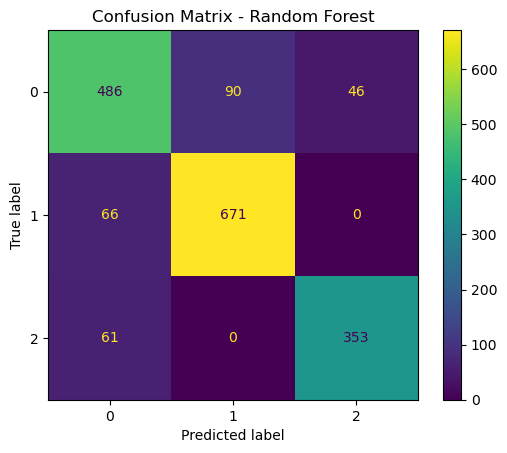

In [85]:
# Compute the confusion matrix
# 0 = call , 1 = raise, 3 = fold

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap='viridis', values_format='d')

# Add a title for clarity
plt.title("Confusion Matrix - Random Forest")
plt.show()

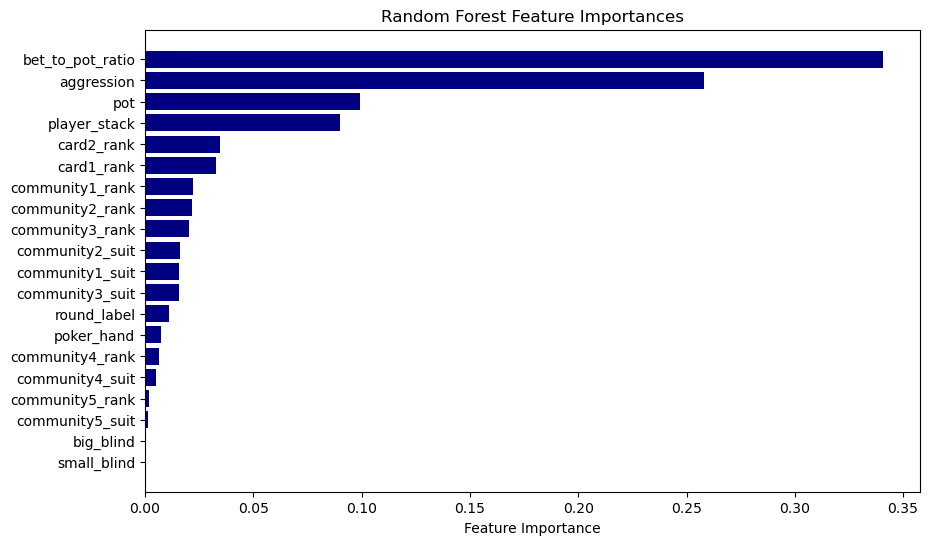

In [87]:
# Plot Feature Importances
importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': rf_clf.feature_importances_}).sort_values(by='Importance')

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='navy')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.savefig('../images/Random_Forest_Feature_Importances.png', dpi=300)
plt.show()

In [89]:
importance_df.round(2)

,Feature,Importance
3,small_blind,0.00
4,big_blind,0.00
17,community5_suit,0.00
12,community5_rank,0.00
16,community4_suit,0.00
11,community4_rank,0.01
5,poker_hand,0.01
0,round_label,0.01
15,community3_suit,0.02
13,community1_suit,0.02


## 📝 How the feature importance playing a role in the Random Forest model?
#### The feature importance help indicating how each feature influences the target variable (`action_label`).

#### Most Influential Features:
  - `bet_to_pot_ratio` (0.34): The most significant feature, contributing heavily to the model's decisions.
  - `aggression` (0.26): Another critical feature influencing predictions.
  - `pot` (0.10) and `player_stack` (0.09): Provide valuable context about the game state.